In [46]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Input, Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from PIL import Image
import os
import pandas as pd
import numpy as np

In [47]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'

In [48]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [49]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [50]:
print(train)

                                             image     label
0         images/train\angry\Training_10118481.jpg     angry
1         images/train\angry\Training_10120469.jpg     angry
2         images/train\angry\Training_10131352.jpg     angry
3         images/train\angry\Training_10161559.jpg     angry
4          images/train\angry\Training_1021836.jpg     angry
...                                            ...       ...
28704  images/train\surprise\Training_99916297.jpg  surprise
28705  images/train\surprise\Training_99924420.jpg  surprise
28706  images/train\surprise\Training_99937001.jpg  surprise
28707  images/train\surprise\Training_99951755.jpg  surprise
28708  images/train\surprise\Training_99984132.jpg  surprise

[28709 rows x 2 columns]


In [51]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [52]:
print(test)
print(test['image'])

                                             image     label
0       images/test\angry\PrivateTest_10131363.jpg     angry
1       images/test\angry\PrivateTest_10304478.jpg     angry
2        images/test\angry\PrivateTest_1054527.jpg     angry
3       images/test\angry\PrivateTest_10590091.jpg     angry
4        images/test\angry\PrivateTest_1109992.jpg     angry
...                                            ...       ...
7173  images/test\surprise\PublicTest_98089595.jpg  surprise
7174  images/test\surprise\PublicTest_98567249.jpg  surprise
7175  images/test\surprise\PublicTest_98972870.jpg  surprise
7176  images/test\surprise\PublicTest_99242645.jpg  surprise
7177  images/test\surprise\PublicTest_99446963.jpg  surprise

[7178 rows x 2 columns]
0         images/test\angry\PrivateTest_10131363.jpg
1         images/test\angry\PrivateTest_10304478.jpg
2          images/test\angry\PrivateTest_1054527.jpg
3         images/test\angry\PrivateTest_10590091.jpg
4          images/test\angry\Pr

In [53]:
from tqdm.notebook import tqdm

In [54]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale =  True )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [55]:
train_features = extract_features(train['image']) 

  0%|          | 0/28709 [00:00<?, ?it/s]

C:\Users\NAKIMULI LYNNETTE\AppData\Roaming\Python\Python311\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [56]:
test_features = extract_features(test['image'])

  0%|          | 0/7178 [00:00<?, ?it/s]

In [57]:
x_train = train_features/255.0
x_test = test_features/255.0

In [58]:
from sklearn.preprocessing import LabelEncoder

In [59]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [60]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [61]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [66]:
inputs = Input(shape=(48, 48, 1))
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

In [68]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test)) 

In [71]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [74]:
from keras.models import model_from_json

In [76]:
json_file = open("facialemotionmodel.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("facialemotionmodel.h5")

In [77]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [78]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [84]:
image = 'images/test/neutral/PrivateTest_59059.jpg'
print("original image is of neutral")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of neutral
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
model prediction is  angry


In [92]:
image = 'images/test/happy/PrivateTest_218533.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
model prediction is  happy


In [93]:
image = 'images/test/surprise/PrivateTest_642696.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
model prediction is  surprise


In [95]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
model prediction is  surprise


C:\Users\NAKIMULI LYNNETTE\AppData\Roaming\Python\Python311\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


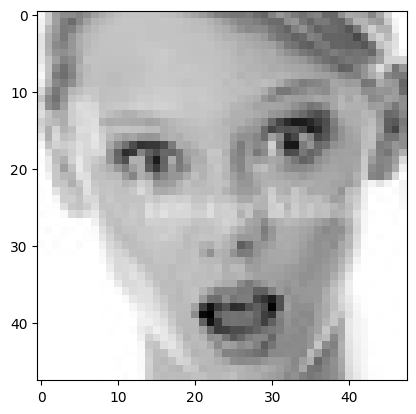

In [96]:
image = 'images/test/surprise/PrivateTest_642696.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of neutral
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
model prediction is  neutral


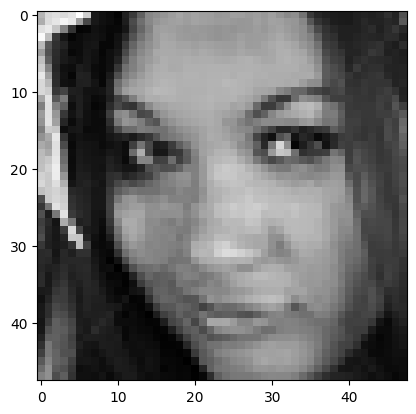

In [97]:
image = 'images/test/neutral/PrivateTest_698548.jpg'
print("original image is of neutral")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
model prediction is  angry


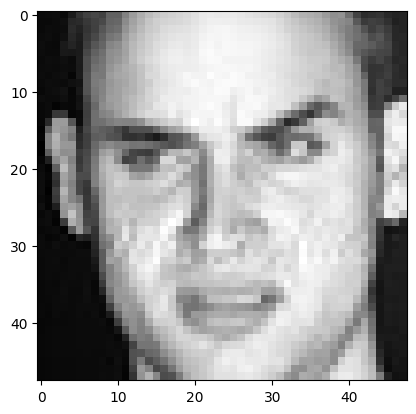

In [98]:
image = 'images/test/disgust/PrivateTest_4396496.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')